# Computing the Dispersion Relations of the Fast Flavor Oscillation Waves in Dense Neutrino Gases with `FOWDR`

## Huaiyu Duan (University of New Mexico)

## Introduction

`fowdr` is a Python package for computing the dispersion relations (DRs) of the fast flavor oscillation waves in dense neutrino gases. After the [pioneering work](https://journals.aps.org/prl/abstract/10.1103/PhysRevLett.118.021101) by Ignacio Izaguirre, Georg Raffelt, and Irene Tamborra, we studied the critical points of the DRs of the neutrino gases that satisfy the following conditions [[PRD 99, 063005]](https://journals.aps.org/prd/abstract/10.1103/PhysRevD.99.063005):

 - The neutrino mixing is dominated by two flavors; 
 - The densities of the neutrinos are high enough so that the mass splitting of the neutrino can be ignored;
 - The neutrinos are almost entirely in the weak-interaction states;
 - The neutrino gas has exact translational symmetries along the $x$ and $y$ directions and approximate translational and axial symmetries about the $z$ direction;
 - The angular distribution of the neutrino electron lepton number (ELN) has no crossing or only one crossing.

This work forms the foundation of `fowdr` which will be referred to as [REF](https://journals.aps.org/prd/abstract/10.1103/PhysRevD.99.063005) in the rest of this document. Please cite [REF](https://journals.aps.org/prd/abstract/10.1103/PhysRevD.99.063005) if you find `fowdr` useful. 

`fowdr` depends on [NumPy](https://numpy.org) and [SciPy](https://www.scipy.org/scipylib/index.html).

## Usage

`fowdr` has two modules `asdr` and `sbdr` which compute the DRs that preserve and break the axial symmetry, respectively. Both modules provide functions `DR_real(G, ...)`, `DR_complexK(G, ...)`, and `DR_complexOmega(G, ...)` to compute the real DR branches (with both real wave number $K$ and frequency $\Omega$), complex-$K$ DR branches (with real $\Omega$), and complex-$\Omega$ DR branches (with real $K$), respectively. The first argument of these functions `G` is a function with a single real argument that gives the ELN distribution $G(u)$, where $u$ is the $z$ component of the neutrino velocity along $z$. All these functions return a list of tuples `(K, Omega)` where `K` and `Omega` are one-dimensional NumPy arrays of the same length that contain a list of ($K$, $\Omega$) on the corresponding DR. Below is an example using a simple linear ELN distribution $G(u)=a - b u$, where $a$ and $b$ are two positive constants.

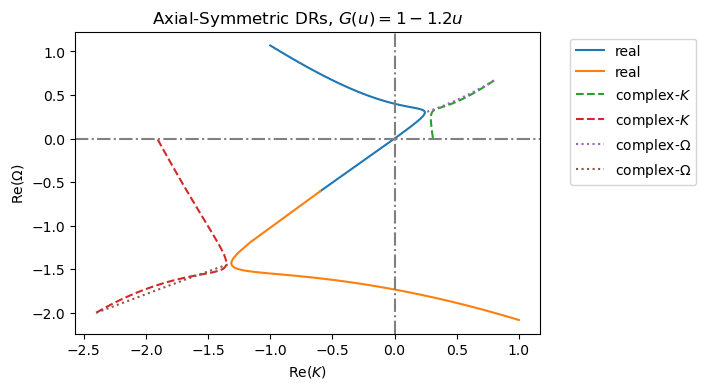

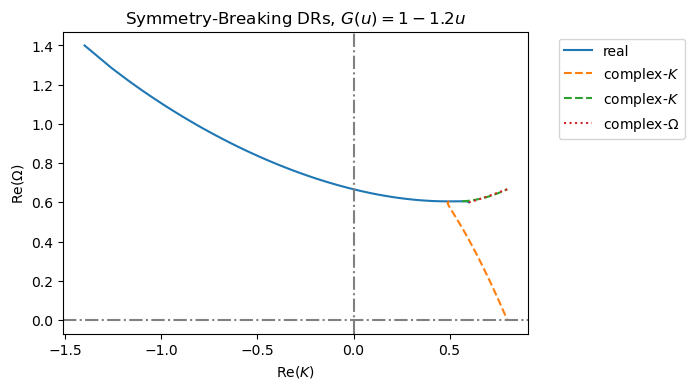

In [1]:
import matplotlib.pyplot as plt
from fowdr import asdr, sbdr

a = 1; b = 1.2
G = lambda u: a - b*u # ELN distribution function G(u) = a - b*u

# plot the symmetry-preserving DRs
plt.figure(dpi=100)
for kk, ww in asdr.DR_real(G): # real DR
    plt.plot(kk, ww, '-', label='real')
for kk, ww in asdr.DR_complexK(G): # complex-K DR
    plt.plot(kk.real, ww, '--', label='complex-$K$')
for kk, ww in asdr.DR_complexOmega(G): # complex-Omega DR
    plt.plot(kk, ww.real, ':', label='complex-$\Omega$')

plt.axhline(0, ls='-.', color='grey') # x axis
plt.axvline(0, ls='-.', color='grey') # y axis
plt.legend(bbox_to_anchor=(1.05, 1), loc="upper left")
plt.xlabel('Re($K$)')
plt.ylabel('Re($\Omega$)')
plt.title(f'Axial-Symmetric DRs, $G(u)={a}-{b:.1f}u$')
plt.show()

# plot the symmetry-breaking DRs
plt.figure(dpi=100)
for kk, ww in sbdr.DR_real(G): # real DR
    plt.plot(kk, ww, '-', label='real')
for kk, ww in sbdr.DR_complexK(G): # complex-K DR
    plt.plot(kk.real, ww, '--', label='complex-$K$')
for kk, ww in sbdr.DR_complexOmega(G): # complex-Omega DR
    plt.plot(kk, ww.real, ':', label='complex-$\Omega$')

plt.axhline(0, ls='-.', color='grey')
plt.axvline(0, ls='-.', color='grey')
plt.legend(bbox_to_anchor=(1.05, 1), loc="upper left")
plt.xlabel('Re($K$)')
plt.ylabel('Re($\Omega$)')
plt.title(f'Symmetry-Breaking DRs, $G(u)={a}-{b:.1f}u$')
plt.show()

Besides the ELN distribution `G`, the DR producing functions also accept the following optional arguments:

 - `num_pts` is the number of points to compute on each DR branch. The default value is 100.
 - `int_opts` is a dictionary of optional keyword arguments that will be passed on to [`scipy.integrate.quad`](https://docs.scipy.org/doc/scipy/reference/generated/scipy.integrate.quad.html) which computes various integrals. It is empty by default.
 - `DR_complexK` and `DR_complexOmega` in both modules accepts `rt_opts` which is a dictionary of optional keyword arguments that will be passed on to [`scipy.optimize.root`](https://docs.scipy.org/doc/scipy/reference/generated/scipy.optimize.root.html). It is empty by default.
 - `shift` indicates whether $K$ and $\Omega$ are the shifted values as defined in Eq. (21) of [REF](https://journals.aps.org/prd/abstract/10.1103/PhysRevD.99.063005). It is `True` by default.
 - It can be numerically challenging to calculate certain properties on a few special points.  `DR_complexK` and `DR_complexOmega` in both modules and `asdr.DR_real` accept a small number `eps` as an optional argument which adjusts the numerical behaviors of some of the underlying functions. Its default value is $10^{-5}$. It can be loosely understood as the uncertainty in the refractive index $n=K/\Omega$.
 - Because the real axially symmetric DRs span from $-\infty$ to $+\infty$, `asdr.DR_real` accepts two optional arguments `maxK` and `minK` which specify the maximum and minimum $K$ values to compute. Their default values are $+1$ and $-1$, respectively.

For simplicity, `fowdr` assumes that $G(-1)>0$. One can always flip the $z$ axis if this is not the case. `fowdr` assumes no presence of ordinary. A uniform matter background  simply shifts $\Omega$ and $K$ [see Eq. (21) of [REF](https://journals.aps.org/prd/abstract/10.1103/PhysRevD.99.063005)].

More examples of how to use `fowdr` can be found in `examples.ipynb`.

## Method

Below is a brief description of the method used by `fowdr`. Please see the source code and [REF](https://journals.aps.org/prd/abstract/10.1103/PhysRevD.99.063005) for details.

### Real Branches

The symmetry-breaking DR branches obey the equation
$$ \mathfrak{D}_\mathrm{SB}(\Omega, K) = J_0 - J_2 - 2 = 0, $$
where
$$ J_p(\Omega, K) = \int_{-1}^1 G(u)\,\frac{u^p}{\Omega - K u}\,\mathrm{d}u $$
is denoted as $I_p$ in [REF](https://journals.aps.org/prd/abstract/10.1103/PhysRevD.99.063005).
Therefore, they can be simply computed as
$$ \Omega(n) = \frac{1}{2}\int_{-1}^1 G(u)\,\frac{1-u^2}{1 - n u}\,\mathrm{d}u $$
and $K(n) = n \Omega(n)$, where the refractive index $n=\Omega/K$ is in the range $[-1, -1]$.

Similarly, the axially symmetric DRs obey the equation
$$ \mathfrak{D}_\mathrm{AS}(\Omega, K) = (J_0+1)(J_2-1) -J_1^2 = 0 $$
which yields
$$ \Omega_\pm(n) = \frac{I_2-I_0\pm\sqrt{\Delta}}{2}, $$
where
$$ I_p(n) = \int_{-1}^1 G(u)\,\frac{u^p}{1 - n u} \,\mathrm{d}u$$
is denoted as $\tilde{I}_p$ in [REF](https://journals.aps.org/prd/abstract/10.1103/PhysRevD.99.063005),
and 
$$ \Delta = (I_2-I_0)^2 + 4(I_2 I_0 - I_1^2). $$
If there is no crossing, $\Omega_\pm(n)$ and $K_\pm(n)= n\Omega_\pm(n)$ give two distinct real DRs for $n\in(-1, 1)$. If there is a crossing (indicated by $G(1)<0$), then $\Delta<0$, and $\Omega_\pm(n)$ and $K_\pm(n)$ with $n\in(-1, n_*]$ give two parts of a single DR that joins at $n=n_*$ where $\Delta(n_*)=0$. Neverless, `as.DR_real` will still return these two parts were two distinct branches. As the crossing deepens, the axially symmetric real DR disappears when $n_*$ reaches $-1$.

### Complex-$K$ Branches

For a given real $\Omega$ on a complex-$K$ DR branch, one can solve $K$ from the DR equation $\mathfrak{D}_\mathrm{SB}=0$ or $\mathfrak{D}_\mathrm{AS}=0$ by using the root finding functions of SciPy. The difficult part of this calculation is to know the range of $\Omega$ and a relative good initial guess of $K$. Fortunately, the end points of the complex-$K$ branches can be calculated [[REF]](https://journals.aps.org/prd/abstract/10.1103/PhysRevD.99.063005).

For the symmetry-breaking case, $\Omega=0$ is one of the end points of a complex-$K$ branch, and the corresponding wave number $K_0$ can be calculated from the DR equation at $\Omega\rightarrow 0^+$ by using the Sokhotski-Plemelj theorem. When there is no ELN crossing, the other end of the complex-$K$ branch is a turning point at $\Omega(n_\mathrm{c})$ on the real branch where 
$$ \left. \frac{\mathrm{d} \Omega}{\mathrm{d} n}\right|_{n=n_\mathrm{c}} = 0. $$
(This point is labeled as $\Omega_\mathrm{b}$ in [REF](https://journals.aps.org/prd/abstract/10.1103/PhysRevD.99.063005).)
A new critical point $n_\mathrm{x}=1/u_\mathrm{x}$ appears when there is an ELN crossing at $u_\mathrm{x}$ where $G(u_\mathrm{x})=0$. (This point is labeled as $\Omega_\mathrm{c}$ in [REF](https://journals.aps.org/prd/abstract/10.1103/PhysRevD.99.063005).)
The wave number $K(n_\mathrm{x})$ can also be computed from the DR equation by using the Sokhotski-Plemelj theorem. If the crossing is shallow, there is a second turning point $n'_\mathrm{c}$ on the real branch, and a complex-$K$ branch runs from $\Omega(n_\mathrm{x})$ to $\Omega(n'_\mathrm{c})$ besides the one from $\Omega(n_\mathrm{c})$ to $\Omega=0$. If the crossing is deep, there is no turning point on the real branch, and there is only one complex-$K$ branch that runs from $\Omega(n_\mathrm{x})$ to $\Omega=0$.

The axially symmetric case is like a pair of symmetry-breaking cases. For example, there two complex-$K$ branches that approach $\Omega=0$ from the positive and negative sides, respectively, and there are two critical points that correspond to $n_\mathrm{x}$ when there is crossing. The plus and minus parts of the real branch can each have zero or two turning points. Therefore, there can be 2, 3, or 4 complex-$K$ branches in the axially symmetric case.

### Complex-$\Omega$ Branches

There is no complex-$\Omega$ DR branch if there is no ELN crossing. When there is crossing, the complex-$\Omega$ branches can also be solved from the DR equations by root finding. The range of the real $K$ of a complex-$\Omega$ branch is again determined by the critical points [[REF]](https://journals.aps.org/prd/abstract/10.1103/PhysRevD.99.063005). For the symmetry-breaking case, one of the end points is at $K(n_\mathrm{x})$, and the other end is on a turning point $K(n''_\mathrm{c})$ on the real branch where
$$ \left. \frac{\mathrm{d} K}{\mathrm{d} n}\right|_{n=n''_\mathrm{c}} = 0. $$
(This point is labeled as $K_\mathrm{t}$ in [REF](https://journals.aps.org/prd/abstract/10.1103/PhysRevD.99.063005).)
The axially symmetric case is again like double the symmetry-breaking case except when there is no real DR branch. In that case, there is only one complex-$\Omega$ branch that runs from $K_+(n_\mathrm{x})$ to $K_-(n_\mathrm{x})$.

## Acknowledgements

This material is based upon work supported by the U.S. Department of Energy, Office of Science, Office of Nuclear Physics under Award Number DE-SC-0017803.